In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import warnings,os
import glob

warnings.filterwarnings('ignore')

Concat the data when the data just produce

In [6]:
path="./result/IL/training/1/"
folder_list = os.listdir(path)
# folder_list

In [30]:

def get_data(raw_data):
  data=raw_data[["state","action"]]
  rot_data = data
  return rot_data
# concate all data to single file
df=pd.DataFrame()

for name in folder_list:

  filename=path+name

  temp=pd.read_csv(filename)
  temp=get_data(temp) # remove the unuse columns

  df = pd.concat([df, temp], ignore_index=True)


df=pd.DataFrame(df)
filename=path
df.to_csv(filename+"/all_result.csv")
print(df)
print("finish")

                                                    state  action
0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       2
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       2
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       2
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       2
...                                                   ...     ...
437701  [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...       3
437702  [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...       3
437703  [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...       3
437704  [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...       3
437705  [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...       4

[437706 rows x 2 columns]
finish


Import dataset

In [21]:
import random
import ast
def print_original_plot(path):
  material=path
  filename="/all_result.csv"
  df=pd.read_csv(material+filename)
  df=df.dropna(axis=0) # drop the unconsistent data long
  df=df.drop(list(df)[0],axis=1)
  df['state']=df['state'].apply(lambda x: np.array(ast.literal_eval(x)))
  return df

In [22]:
path="./result/IL/training/1/"
folder_list = os.listdir(path)
df_all=pd.DataFrame()

df_temp=print_original_plot(path=path)

df_temp

,state,action
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
...,...,...
437701,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...",3
437702,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...",3
437703,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...",3
437704,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...",3


In [23]:
len(df_temp.iloc[0]['state'])

30

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [25]:
X=df_temp["state"]
y=df_temp["action"].astype(int)

In [39]:
X = np.array(X.tolist())
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]], shape=(437706, 30))

In [40]:
y

0         1
1         2
2         2
3         2
4         2
         ..
437701    3
437702    3
437703    3
437704    3
437705    4
Name: action, Length: 437706, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = MLPClassifier((16,8),random_state=1, max_iter=300).fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 68.26%


In [45]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
temp=classification_report(y_test, y_pred, output_dict=True)
output=pd.DataFrame(temp)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.97      0.80     30929
           1       0.00      0.00      0.00     11782
           2       0.68      0.95      0.80     31254
           3       0.00      0.00      0.00     11535
           4       0.00      0.00      0.00      2042

    accuracy                           0.68     87542
   macro avg       0.27      0.38      0.32     87542
weighted avg       0.48      0.68      0.57     87542



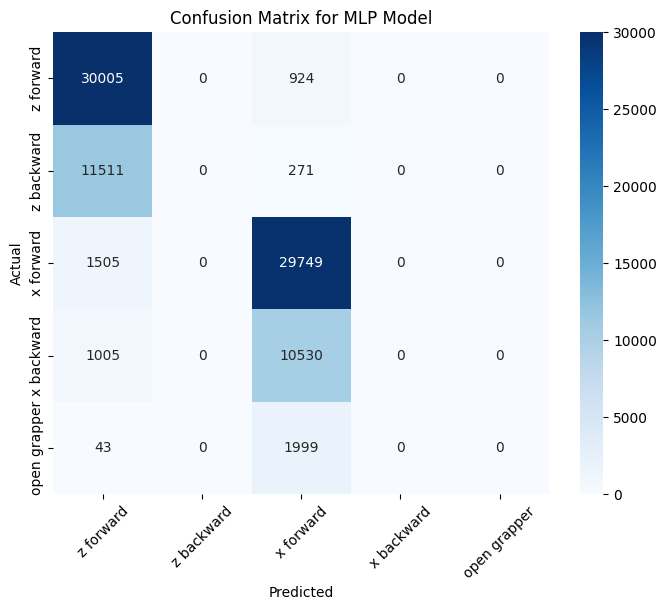

In [51]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['z forward','z backward','x forward','x backward','open grapper'], yticklabels=['z forward','z backward','x forward','x backward','open grapper'])
plt.xlabel('Predicted',)
plt.xticks(rotation=45)
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Model')
plt.show()

<Axes: >

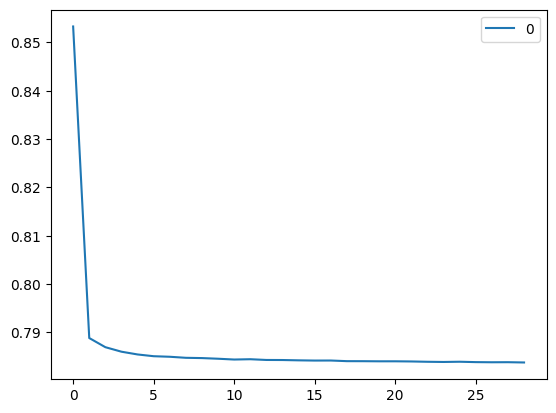

In [47]:
loss_values = clf.loss_curve_

pd.DataFrame(loss_values).plot()

In [52]:
from policy.ENV.env import RLEnv

In [57]:
env=RLEnv()
sucess=0
for j in range(1000):
    trajectory = [] 
    tot_reward = 0
    env.reset()
    
    for i in range(110):
        current = env.get_observation()
        print(current)
        action= clf.predict(np.array(current[0].tolist()).reshape(-1, 1))
        print('action:',action)
        next, reward, done, info = env.step(action)
        # print('ground true:',env.current_state)
        # print('next:',next)
        # print('reward:',reward)
        # print('tot_reward:',tot_reward)
        # print('done:',done)
        trajectory.append({
            'step': i,
            'state': current.tolist() if isinstance(current, np.ndarray) else current,
            'action': int(action),
            'reward': reward,
            'tot_reward': tot_reward,
            'next_state': next.tolist() if isinstance(next, np.ndarray) else next,
            'done': done,
        })
        if done:
            sucess+=1
            print('sucess:',sucess)
            break

ValueError: X has 1 features, but MLPClassifier is expecting 30 features as input.

In [29]:
import pickle 
my_model_clf = pickle.load(open("Knn_train_11_01", 'rb')) 
# result_score = my_model_clf.score(X_test,y_test) 

In [15]:
# print("Score: ",result_score)

Score:  1.0


In [33]:
y_pred = my_model_clf.predict(X_test)
# print(classification_report(y_test, y_pred, target_names=labellist))
for i in y_pred:
    print(labellist[i])

bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow
bra_hollow